In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import chardet # for unknown encodings
from collections import Counter

In [2]:
# import data into Pandas DataFrame
beer = pd.read_csv('C:/ml/beer_reviews.csv')
beer.shape

(1586614, 13)

So we've over one million reviews, let's find out how many beers

In [3]:
beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


So we can see we have both names and ID numbers for breweries and beers, reviewer usernames, a datetime field of the review, the beer's style, name, and alcohol by volume % (ABV), review scores for different characteristics of the beer, such as appearance, aroma, palate, and taste, and an overall score of the beer.

In [5]:
len(beer['beer_beerid'].value_counts())

66055

So we have just over 66 thousand beers.

In [4]:
beer[beer.isnull().any(axis=1)]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
927,2724,Pacific Coast Brewing Company,1293559076,1.0,1.5,3.0,womencantsail,American Strong Ale,2.5,1.5,Megalodon,NaN,64803
944,2724,Pacific Coast Brewing Company,1205614154,1.5,2.0,1.5,JDV,Belgian Strong Pale Ale,1.0,3.0,Holiday Trappist Style Ale,NaN,41584
960,2724,Pacific Coast Brewing Company,1215743407,4.0,3.5,4.0,hoegaardenhero,American Amber / Red Ale,4.5,3.5,Emerald Ale,NaN,37498
961,2724,Pacific Coast Brewing Company,1203379699,4.0,4.0,4.0,barleywinefiend,American Amber / Red Ale,4.0,4.0,Emerald Ale,NaN,37498
962,2724,Pacific Coast Brewing Company,1183260774,4.0,4.0,4.5,Mark,American Amber / Red Ale,4.5,4.0,Emerald Ale,NaN,37498


not concerned w/ ABV for this particular analysis

In [5]:
beer[beer['beer_style'].isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


In [6]:
beer['beer_style'].groupby(beer['beer_style']).value_counts()#.to_csv('beer_styles.csv',sep=',')
#beer['beer_style'].groupby(beer['beer_style']).value_counts().to_csv('beer_styles.csv',sep=',')

beer_style                           beer_style                         
Altbier                              Altbier                                  7741
American Adjunct Lager               American Adjunct Lager                  30749
American Amber / Red Ale             American Amber / Red Ale                45751
American Amber / Red Lager           American Amber / Red Lager               9311
American Barleywine                  American Barleywine                     26728
American Black Ale                   American Black Ale                      11446
American Blonde Ale                  American Blonde Ale                     12726
American Brown Ale                   American Brown Ale                      25297
American Dark Wheat Ale              American Dark Wheat Ale                  1470
American Double / Imperial IPA       American Double / Imperial IPA          85977
American Double / Imperial Pilsner   American Double / Imperial Pilsner       5435
American Doubl

In [47]:
with open('beer_origins.csv', 'rb') as f:
    result = chardet.detect(f.read())

beer_origin = pd.read_csv('./beer_origins.csv', encoding=result['encoding'])
beer_origin.head()

,beer_style,beer_origin
0,American Adjunct Lager,American
1,American Amber / Red Ale,American
2,American Amber / Red Lager,American
3,American Barleywine,American
4,American Black Ale,American


In [44]:
all_beers = pd.merge(beer, beer_origin, on='beer_style')
all_beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_origin
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,German
1,9020,Yazoo Brewing Company,1224350360,4.0,4.0,3.0,Likeburning,Hefeweizen,4.0,3.5,Hefeweizen,5.0,20575,German
2,1454,Broad Ripple Brew Pub,1316545215,4.0,3.5,3.0,JamesS,Hefeweizen,4.0,4.5,Hefe Weizen,4.5,73291,German
3,850,Moon River Brewing Company,1133896338,3.5,3.5,3.0,GusterFan,Hefeweizen,3.0,3.5,Wheezy Heifer,5.5,27229,German
4,850,Moon River Brewing Company,1193191936,4.0,4.0,3.5,harpo111,Hefeweizen,3.5,3.5,Hefe-Weizen,5.5,2776,German


In [12]:
all_beers.tail()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_origin
1555311,13629,Malmgårdin Panimo,1253163788,4.0,4.0,4.0,popery,Sahti,4.0,4.5,Arctic Circle Ale,7.3,48250,Finnish
1555312,13629,Malmgårdin Panimo,1250817872,4.0,4.5,4.0,Proteus93,Sahti,4.5,4.0,Arctic Circle Ale,7.3,48250,Finnish
1555313,13629,Malmgårdin Panimo,1250132277,4.5,4.0,4.5,peabody,Sahti,4.5,4.0,Arctic Circle Ale,7.3,48250,Finnish
1555314,13629,Malmgårdin Panimo,1238134086,4.5,4.0,4.0,DaveHS,Sahti,4.0,4.5,Arctic Circle Ale,7.3,48250,Finnish
1555315,13629,Malmgårdin Panimo,1236060166,4.0,4.0,4.0,feloniousmonk,Sahti,4.0,4.0,Arctic Circle Ale,7.3,48250,Finnish


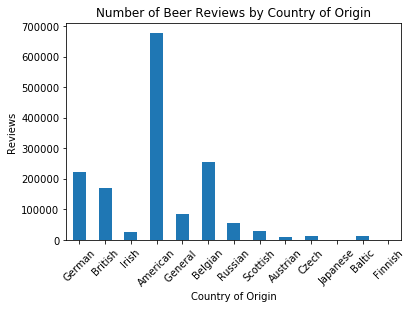

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

origin_counts = Counter(all_beers['beer_origin'])
origins_df = pd.DataFrame.from_dict(origin_counts, orient='index')
origins_df.plot(kind='bar',legend=None)

plt.xticks(rotation=45)
plt.xlabel('Country of Origin')
plt.ylabel('Reviews') # value from 1st row  

# label figure
plt.title('Number of Beer Reviews by Country of Origin')

# start y axis at 0 to be more honest
#plt.axis([1959, 2011,0,25])

plt.show()

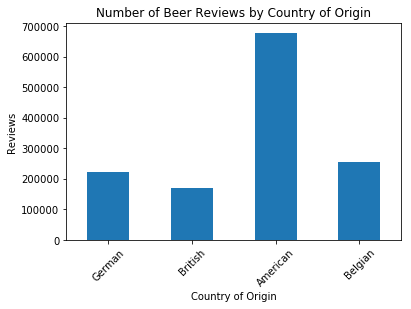

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

origin_counts = Counter(all_beers['beer_origin'])
origins_df = pd.DataFrame.from_dict(origin_counts, orient='index')
origins_df_high = origins_df[origins_df[0] > 100000]

origins_df_high.plot(kind='bar',legend=None)

plt.xticks(rotation=45)
plt.xlabel('Country of Origin')
plt.ylabel('Reviews') # value from 1st row  

# label figure
plt.title('Number of Beer Reviews by Country of Origin')

# start y axis at 0 to be more honest
#plt.axis([1959, 2011,0,25])

plt.show()

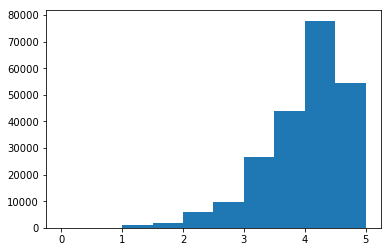

In [49]:
plt.hist(all_beers['review_overall'][all_beers['beer_origin'] == 'German'])
plt.show()

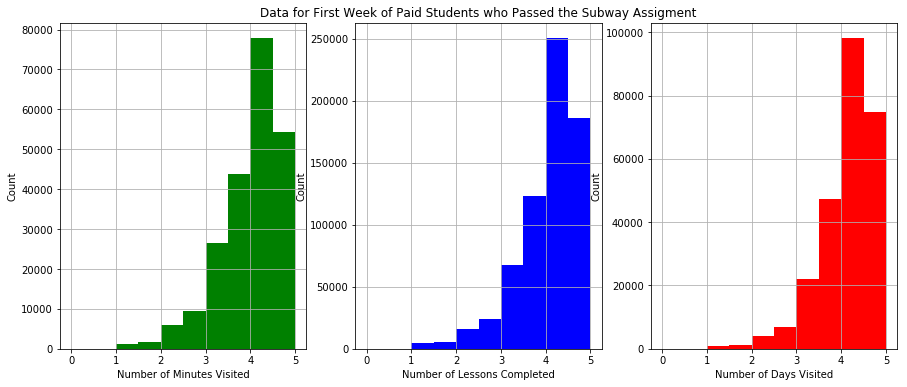

In [89]:
german_beer_reviews = all_beers['review_overall'][all_beers['beer_origin'] == 'German']
american_beer_reviews = all_beers['review_overall'][all_beers['beer_origin'] == 'American']
belgian_beer_reviews = all_beers['review_overall'][all_beers['beer_origin'] == 'Belgian']

fig, axes = plt.subplots(1, 3, figsize=(15,6)) # 2 resulting objects

axes[0].hist(german_beer_reviews, 
             10, 
            #normed = False, 
             facecolor = 'green')
axes[0].set_xlabel('Number of Minutes Visited')
axes[0].set_ylabel('Count')
#axes[0].set_title('Number of Minutes Visited in First Week by Paid Students who Passed the Subway Assigment')
axes[0].grid(True)

axes[1].hist(american_beer_reviews, 
             10, 
            #normed = False, 
             facecolor = 'blue')
axes[1].set_xlabel('Number of Lessons Completed')
axes[1].set_ylabel('Count')
axes[1].set_title('Data for First Week of Paid Students who Passed the Subway Assigment')
axes[1].grid(True)

axes[2].hist(belgian_beer_reviews, 
             10, 
             #normed = False, 
             facecolor = 'red')
axes[2].set_xlabel('Number of Days Visited')
axes[2].set_ylabel('Count')
#axes[2].set_title('Data for First Week of Paid Students who Passed the Subway Assigment')
axes[2].grid(True)

plt.show()

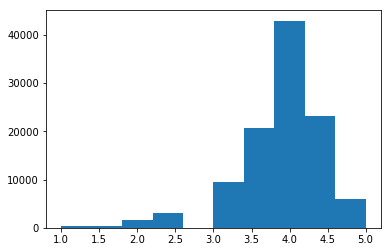

In [23]:
plt.hist(all_beers['review_overall'][all_beers['beer_origin'] == 'Belgian'])
plt.show()

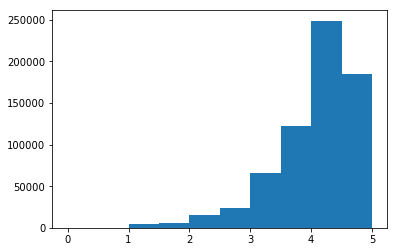

In [22]:
plt.hist(all_beers['review_overall'][all_beers['beer_origin'] == 'American'])
plt.show()

most american, 1/3 german, then 1/2 belgian --> take samples?